In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Windows\Temp\ipykernel_6244\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("C:/Users/benysar/Documents/GitHub/BTB_extraction-main/src/output/BTB_structurated_raw.xlsx")

In [3]:
df["Date de prélèvement"] = pd.to_datetime(df["Date de prélèvement"],format='mixed')
df = df.sort_values(by="Date de prélèvement")
df['Year'] = df['Date de prélèvement'].dt.year

In [4]:
df["Year"].value_counts()

Year
2019    539
2021    501
2022    495
2023    484
2018    428
2020    410
2017    380
2016    259
2024     47
2014     42
2015     31
2012     26
2010     16
2013     14
2009      9
2011      8
2008      6
2002      2
Name: count, dtype: int64

In [5]:
df[df["Year"] == 2002]

,Filename,IPP,Nom,Prénom,Date de naissance,Sexe,Date de prélèvement,Technique,Niveaux de coupes,Site,...,BALT,Thrombus fibrino-cruorique,Nécrose ischémique,Inclusions virales,Agent pathogène,Eosinophilie (interstitielle/alvéolaire),Remodelage vasculaire,Matériel étranger d’inhalation,Conclusion,Year
3460,0300797105_5C772943-3A27-4F32-AEB1-728D5BEC0A4...,30079710,CHEVROT Pr,CHRISTIAN,26/12/1956,M,2002-12-12,HES,16,noncommuniqu,...,NON,NON,NON,NON,NON,NON,NON,NON,1/ Lavage bronchob alvolaire : ...,2002
2752,0300710706_B791288C-2644-40E0-B926-C1867D818D1...,30071070,PHILIPPEAU Pr,LAURENT,02/03/1966,M,2002-12-21,HES,16,NC,...,NON,NON,NON,NON,NON,NON,NON,NON,1. Lavage bronchiolo alvolaire : ...,2002


In [6]:
# Group by Year and calculate missing value proportion
missing_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean()).drop('Year', axis=1)


C:\Windows\Temp\ipykernel_6244\3064211332.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean()).drop('Year', axis=1)


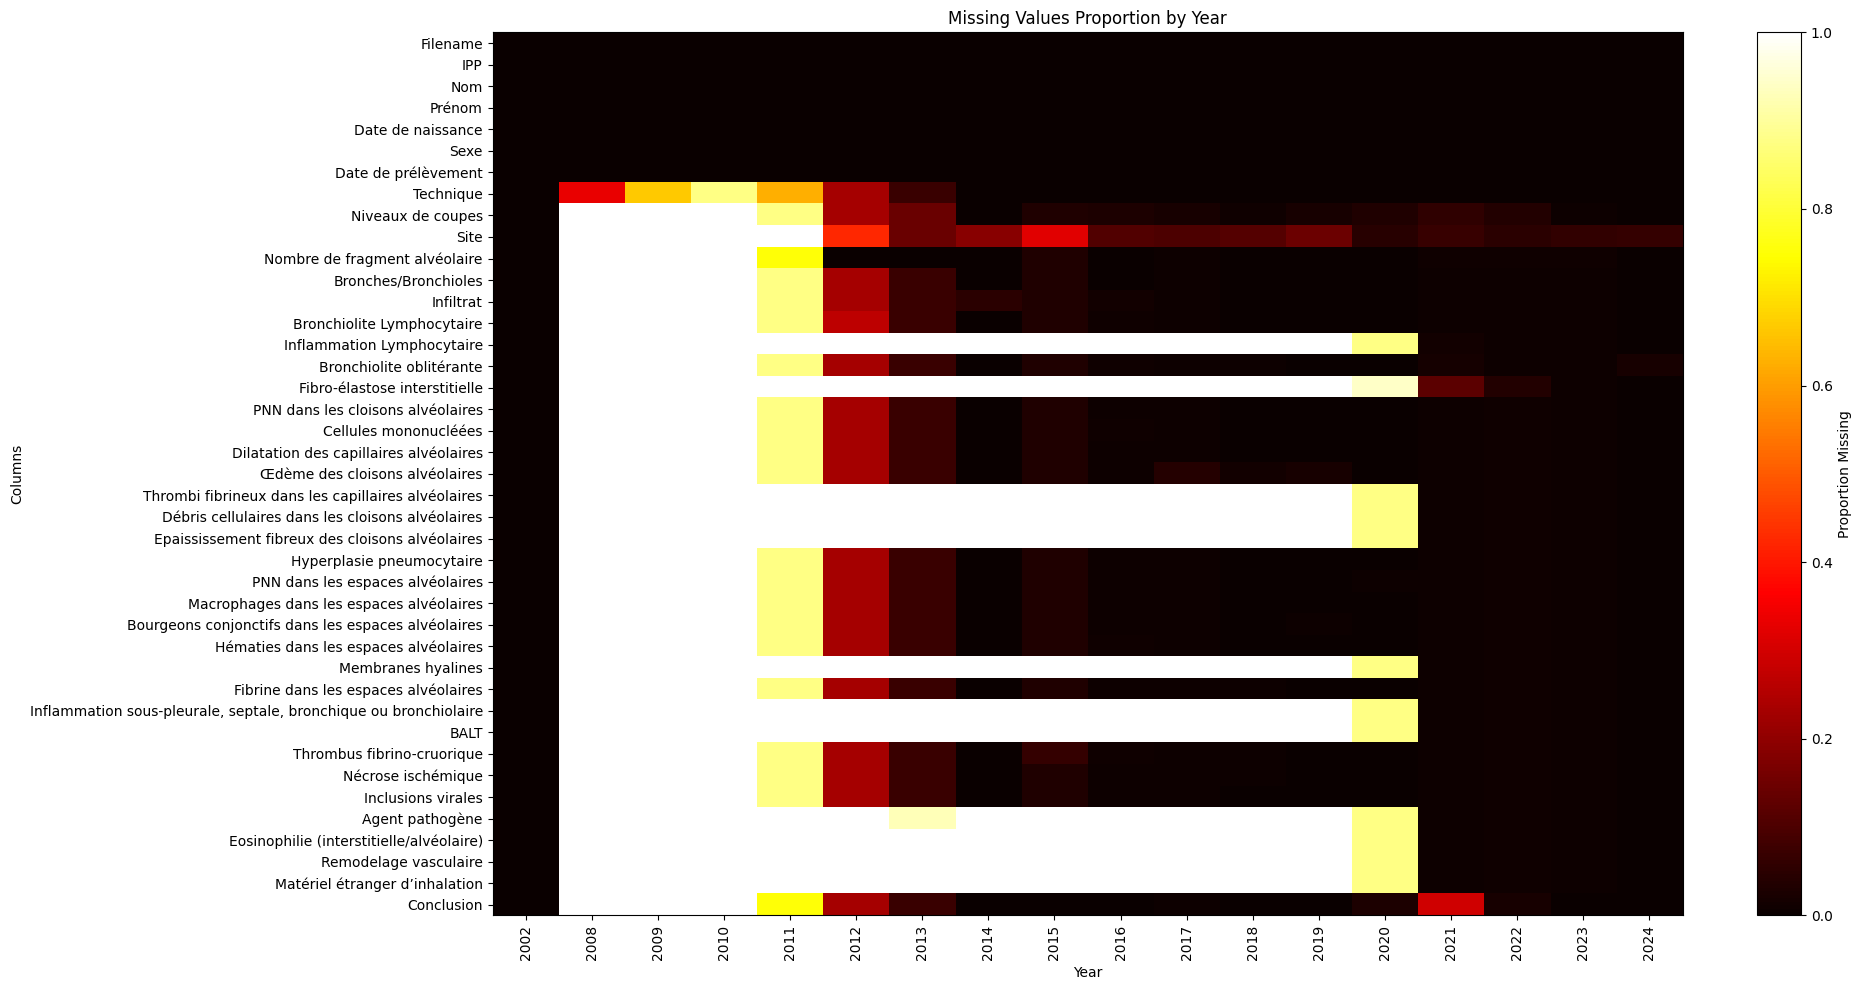

In [7]:

# Setting the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Preparing the plot
plt.imshow(missing_by_year.T, cmap='hot', aspect='auto')

# Customizing the plot with column names and years
plt.colorbar(label='Proportion Missing')
plt.xticks(ticks=np.arange(len(missing_by_year)), labels=missing_by_year.index)
plt.yticks(ticks=np.arange(len(missing_by_year.columns)), labels=missing_by_year.columns)

plt.title('Missing Values Proportion by Year')
plt.xlabel('Year')
plt.ylabel('Columns')

plt.xticks(rotation=90)  # Rotate year labels for better readability

plt.tight_layout()  # Adjust layout
plt.show()
